# Install and import packages

In [507]:
# data representation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from imblearn import over_sampling

# feature engineering
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

import shap, pymrmr
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, SelectFromModel
from sklearn.inspection import permutation_importance

# model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# ML models
from sklearn.linear_model import LogisticRegressionCV, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline

# model metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score,\
        roc_curve, confusion_matrix, precision_recall_curve, auc, f1_score, precision_score, recall_score

# deep learning
import tensorflow as tf




# Data pre-processing

## Data importing and processing

In [6]:
# load the data
def get_omics(link):
    profile = pd.read_csv(link, delimiter='\t', header=0).T
    # get the names of all features
    names = profile.iloc[0, :]
    # rename columns
    profile = profile.iloc[1:,:]
    profile = profile.reset_index(drop=False)
    profile.rename(columns = {'index': 'External ID'},  
          inplace = True)
    # sort the samples by sample ID
    profile = profile.sort_values(by='External ID', axis=0, ascending=True).reset_index(drop=True)
    
    print(link)
    print(profile.shape)
    print(names)
    print(profile.iloc[:5, :5])
    return profile.reset_index(drop=True), names

### MGX

In [7]:
# get MGX OTU
mgx_otu, mgx_otu_names = get_omics('HMP2/MGX/mgx_taxonomic_profiles.tsv')

HMP2/MGX/mgx_taxonomic_profiles.tsv
(1638, 1480)
0                                              k__Archaea
1                             k__Archaea|p__Euryarchaeota
2          k__Archaea|p__Euryarchaeota|c__Methanobacteria
3       k__Archaea|p__Euryarchaeota|c__Methanobacteria...
4       k__Archaea|p__Euryarchaeota|c__Methanobacteria...
                              ...                        
1474    k__Viruses|p__Viruses_noname|c__Viruses_noname...
1475    k__Viruses|p__Viruses_noname|c__Viruses_noname...
1476    k__Viruses|p__Viruses_noname|c__Viruses_noname...
1477    k__Viruses|p__Viruses_noname|c__Viruses_noname...
1478                                         unclassified
Name: #SampleID, Length: 1479, dtype: object
  External ID  0  1  2  3
0  CSM5FZ3N_P  0  0  0  0
1  CSM5FZ3R_P  0  0  0  0
2  CSM5FZ3T_P  0  0  0  0
3  CSM5FZ3V_P  0  0  0  0
4  CSM5FZ3X_P  0  0  0  0


In [8]:
# get MGX pathways
mgx_path, mgx_path_names = get_omics('HMP2/MGX/mgx_pathabundance_relab.tsv')

HMP2/MGX/mgx_pathabundance_relab.tsv
(1638, 10885)
0        1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
1        1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
2        1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
3        1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
4        1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
                               ...                        
10879    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
10880    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
10881    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
10882    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
10883       VALSYN-PWY: L-valine biosynthesis|unclassified
Name: # Pathway, Length: 10884, dtype: object
  External ID          0            1  2            3
0  CSM5FZ3N_P  0.0210425            0  0  0.000536374
1  CSM5FZ3R_P  0.0243021            0  0  0.000271561
2  CSM5FZ3T_P  0.0202706            0  0            0
3  CSM5FZ3V_P  0.0206666  0.000211376 

In [9]:
# get MGX enzymes
mgx_ecs, mgx_ec_names = get_omics('HMP2/MGX/mgx_ecs_relab.slim.tsv')

HMP2/MGX/mgx_ecs_relab.slim.tsv
(1638, 2174)
0       1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...
1               1.1.1.102: 3-dehydrosphinganine reductase
2                  1.1.1.103: L-threonine 3-dehydrogenase
3                    1.1.1.108: Carnitine 3-dehydrogenase
4         1.1.1.116: D-arabinose 1-dehydrogenase (NAD(+))
                              ...                        
2168                         6.5.1.2: DNA ligase (NAD(+))
2169                            6.5.1.3: RNA ligase (ATP)
2170     6.5.1.4: RNA 3'-terminal-phosphate cyclase (ATP)
2171                         6.6.1.1: Magnesium chelatase
2172                            6.6.1.2: Cobaltochelatase
Name: # Gene Family, Length: 2173, dtype: object
  External ID           0  1            2  3
0  CSM5FZ3N_P  0.00143264  0  0.000927413  0
1  CSM5FZ3R_P   0.0013314  0  0.000895955  0
2  CSM5FZ3T_P  0.00149574  0  0.000309009  0
3  CSM5FZ3V_P  0.00197502  0   0.00115018  0
4  CSM5FZ3X_P  0.00137804  0  0.000211788  

In [10]:
# get MGX enzymes
mgx_kos, mgx_ko_names = get_omics('HMP2/MGX/mgx_kos_relab.slim.tsv')

HMP2/MGX/mgx_kos_relab.slim.tsv
(1638, 7762)
0             K00984: streptomycin 3"-adenylyltransferase
1       K03042: DNA-directed RNA polymerase subunit A"...
2       K03045: DNA-directed RNA polymerase subunit B"...
3       K03050: DNA-directed RNA polymerase subunit E"...
4                          K10673: streptomycin 3"-kinase
                              ...                        
7756    K19609: two-component system, OmpR family, sen...
7757    K19610: two-component system, OmpR family, res...
7758                 K19611: ferric enterobactin receptor
7759                                      K19648: NO_NAME
7760                                      K19659: NO_NAME
Name: # Gene Family, Length: 7761, dtype: object
  External ID            0  1  2  3
0  CSM5FZ3N_P            0  0  0  0
1  CSM5FZ3R_P            0  0  0  0
2  CSM5FZ3T_P            0  0  0  0
3  CSM5FZ3V_P  5.76941e-07  0  0  0
4  CSM5FZ3X_P            0  0  0  0


### MTX

In [11]:
# get MTX enzymes
mtx_ecs, mtx_ec_names = get_omics('HMP2/MTX/mtx_ecs_relab.tsv')

HMP2/MTX/mtx_ecs_relab.tsv
(735, 70712)
0        1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...
1        1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...
2        1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...
3        1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...
4        1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...
                               ...                        
70706    6.6.1.2: Cobaltochelatase|g__Methanobrevibacte...
70707    6.6.1.2: Cobaltochelatase|g__Odoribacter.s__Od...
70708    6.6.1.2: Cobaltochelatase|g__Porphyromonas.s__...
70709    6.6.1.2: Cobaltochelatase|g__Porphyromonas.s__...
70710               6.6.1.2: Cobaltochelatase|unclassified
Name: # Gene Family, Length: 70711, dtype: object
  External ID            0  1  2  3
0    CSM5FZ4M   0.00321649  0  0  0
1    CSM5MCUO    0.0016966  0  0  0
2    CSM5MCVN   0.00280637  0  0  0
3    CSM5MCW6  3.50319e-05  0  0  0
4    CSM5MCWC  0.000769522  0  0  0


In [12]:
# get MTX gene families
# mtx_genefam, mtx_genefam_names = get_omics('HMP2/MTX/mtx_genefamilies.tsv')

In [13]:
# get MTX pathways
mtx_path, mtx_path_names = get_omics('HMP2/MTX/mtx_pathabundance_relab.tsv')

HMP2/MTX/mtx_pathabundance_relab.tsv
(735, 6062)
0       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
1       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
2       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
3       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
4       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
                              ...                        
6056    VALSYN-PWY: L-valine biosynthesis|g__Synergist...
6057    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
6058    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
6059    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
6060       VALSYN-PWY: L-valine biosynthesis|unclassified
Name: # Pathway, Length: 6061, dtype: object
  External ID           0  1  2  3
0    CSM5FZ4M    0.015748  0  0  0
1    CSM5MCUO  0.00751257  0  0  0
2    CSM5MCVN    0.025239  0  0  0
3    CSM5MCW6   0.0170059  0  0  0
4    CSM5MCWC  0.00201205  0  0  0


### MBX

In [14]:
# get MGX metabolites
# mbx_bolite, mbx_bolite_names = get_omics('HMP2/MBX/mbx_metabolomics.tsv')
# mbx_bolite = pd.read_csv('HMP2/MBX/mbx_metabolomics.tsv', delimiter='\t')

### MVX

In [16]:
# get MVX OTU
mvx_otu, mvx_otu_names = get_omics('HMP2/MVX/mvx_taxonomic_profiles.tsv')

HMP2/MVX/mvx_taxonomic_profiles.tsv
(329, 57)
0     k__Viruses|p__Viruses_noname|c__Viruses_noname...
1     k__Viruses|p__Viruses_noname|c__Viruses_noname...
2     k__Viruses|p__Viruses_noname|c__Viruses_noname...
3     k__Viruses|p__Viruses_noname|c__Viruses_noname...
4     k__Viruses|p__Viruses_noname|c__Viruses_noname...
5     k__Viruses|p__Viruses_noname|c__Viruses_noname...
6     k__Viruses|p__Viruses_noname|c__Viruses_noname...
7     k__Viruses|p__Viruses_noname|c__Viruses_noname...
8     k__Viruses|p__Viruses_noname|c__Viruses_noname...
9     k__Viruses|p__Viruses_noname|c__Viruses_noname...
10    k__Viruses|p__Viruses_noname|c__Viruses_noname...
11    k__Viruses|p__Viruses_noname|c__Viruses_noname...
12    k__Viruses|p__Viruses_noname|c__Viruses_noname...
13    k__Viruses|p__Viruses_noname|c__Viruses_noname...
14    k__Viruses|p__Viruses_noname|c__Viruses_noname...
15    k__Viruses|p__Viruses_noname|c__Viruses_noname...
16    k__Viruses|p__Viruses_noname|c__Viruses_noname...
17

In [17]:
# get MVX maps
mvx_map, mvx_map_names = get_omics('HMP2/MVX/mvx_virome_virmap_analysis.tsv')

HMP2/MVX/mvx_virome_virmap_analysis.tsv
(703, 261)
0      superkingdom=Viruses;dsDNA viruses, no RNA sta...
1      superkingdom=Viruses;dsDNA viruses, no RNA sta...
2      superkingdom=Viruses;dsDNA viruses, no RNA sta...
3      superkingdom=Viruses;dsDNA viruses, no RNA sta...
4      superkingdom=Viruses;dsDNA viruses, no RNA sta...
                             ...                        
255    superkingdom=Viruses;unclassified viruses;fami...
256    superkingdom=Viruses;unclassified viruses;fami...
257    superkingdom=Viruses;unclassified viruses;fami...
258    superkingdom=Viruses;unclassified viruses;spec...
259    superkingdom=Viruses;unclassified viruses;spec...
Name: Virus, Length: 260, dtype: object
  External ID  0  1  2  3
0    CSM5FZ4M  0  0  0  0
1    CSM5MCUO  0  0  0  0
2    CSM5MCVN  0  0  0  0
3    CSM5MCW6  0  0  0  0
4    CSM5MCWC  0  0  0  0


### Metadata

In [20]:
# import metadata
metadata = pd.read_csv('HMP2/hmp2_metadata.csv')
metadata['diseased'] = metadata['diagnosis'].replace({'UC': 1, 'CD': 1, 'nonIBD': 0})

Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types.Specify dtype option on import or set low_memory=False.


In [21]:
# metadata head
metadata.iloc[:10, :10].head()

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,NaN,NaN,1,ibdmdb
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,NaN,NaN,1,ibdmdb
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,NaN,NaN,1,ibdmdb
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,NaN,NaN,1,ibdmdb
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,NaN,NaN,1,ibdmdb


In [22]:
# check out metadata columns
metadata.columns

Index(['Project', 'External ID', 'Participant ID', 'site_sub_coll',
       'data_type', 'week_num', 'date_of_receipt', 'interval_days',
       'visit_num', 'Research Project',
       ...
       'Proteomics received at LBNL:', 'Stool Sample ID:  Tube A  (EtOH)',
       'Sample ID: Tube B (No preservative)',
       'Tube A and B received at Broad:', 'stool_id', 'smoking status',
       'Number years smoked', 'Age when started smoking',
       'How many cigarettes/cigars/etc. do you smoke per day?', 'diseased'],
      dtype='object', length=491)

In [24]:
# get microbiome data types, such as 16S, MGX, MTX,...
data_types = metadata['data_type'].unique()

In [25]:
# get the particular metadata for each data type
def get_meta(data):
    meta = metadata[metadata['data_type'] == data]
    # sort metadata by sample ID
    meta = meta.sort_values(by='External ID', axis=0, ascending=True).reset_index(drop=True)
    print('# of samples', meta.shape[0])
    print('# of participants', len(meta['Participant ID'].unique()))
    print('# of diseased', meta['diagnosis'].value_counts(normalize=True))
    return meta

In [26]:
# get and inspect each type of data
meta = {}
for each in data_types:
    print(each)
    meta[each] = get_meta(each)

biopsy_16S
# of samples 178
# of participants 81
# of diseased CD        0.483146
nonIBD    0.258427
UC        0.258427
Name: diagnosis, dtype: float64
host_genome
# of samples 92
# of participants 92
# of diseased CD        0.50000
UC        0.26087
nonIBD    0.23913
Name: diagnosis, dtype: float64
host_transcriptomics
# of samples 252
# of participants 90
# of diseased CD        0.503968
UC        0.293651
nonIBD    0.202381
Name: diagnosis, dtype: float64
metabolomics
# of samples 546
# of participants 106
# of diseased CD        0.485348
UC        0.267399
nonIBD    0.247253
Name: diagnosis, dtype: float64
metagenomics
# of samples 1638
# of participants 130
# of diseased CD        0.457875
UC        0.280220
nonIBD    0.261905
Name: diagnosis, dtype: float64
metatranscriptomics
# of samples 835
# of participants 109
# of diseased CD        0.471856
UC        0.285030
nonIBD    0.243114
Name: diagnosis, dtype: float64
methylome
# of samples 449
# of participants 94
# of diseased CD

### Combined data

In [27]:
data_types

array(['biopsy_16S', 'host_genome', 'host_transcriptomics',
       'metabolomics', 'metagenomics', 'metatranscriptomics', 'methylome',
       'proteomics', 'serology', 'stool_16S', 'viromics'], dtype=object)

In [28]:
# assign each metadata subset to a variable
mgx_meta = meta['metagenomics']
mtx_meta = meta['metatranscriptomics']
mbx_meta = meta['metabolomics']
mvx_meta = meta['viromics']

In [29]:
# merge MGX OTU with metadata
mgx_otu_d = pd.merge(mgx_meta[['External ID', 'Participant ID', 'diseased']], mgx_otu,  on=['External ID'])
mgx_otu_d.iloc[:5, :10]

,External ID,Participant ID,diseased,0,1,2,3,4,5,6
0,CSM5FZ3N_P,C3001,1,0,0,0,0,0,0,0
1,CSM5FZ3R_P,C3001,1,0,0,0,0,0,0,0
2,CSM5FZ3T_P,C3002,1,0,0,0,0,0,0,0
3,CSM5FZ3V_P,C3001,1,0,0,0,0,0,0,0
4,CSM5FZ3X_P,C3002,1,0,0,0,0,0,0,0


In [30]:
# merge MTX pathways with metadata
mtx_path_d = pd.merge(mtx_meta[['External ID', 'Participant ID', 'diseased']], mtx_path,  on='External ID')
mtx_path_d.iloc[:5, :10]

,External ID,Participant ID,diseased,0,1,2,3,4,5,6
0,CSM5FZ4M,C3003,1,0.015748,0,0,0,0,0,0
1,CSM5MCUO,C3006,1,0.00751257,0,0,0,0,0,0
2,CSM5MCVN,C3002,1,0.025239,0,0,0,0,0,0
3,CSM5MCW6,C3008,1,0.0170059,0,0,0,0,0,0
4,CSM5MCWC,C3009,1,0.00201205,0,0,0,0,0,0


In [31]:
# collapse MGX OTU data to patient level
mgx_cols = ['Participant ID', 'diseased']
mgx_cols.extend(list(range(1479)))
mgx_otu_d_mean = mgx_otu_d[mgx_cols].groupby('Participant ID').mean(numeric_only=False)

In [508]:
mgx_otu_d_mean.iloc[:5, :5]

,diseased,0,1,2,3
Participant ID,,,,,
C3001,1,0.000000,0.000000,0.000000,0.000000
C3002,1,0.000000,0.000000,0.000000,0.000000
C3003,1,0.000000,0.000000,0.000000,0.000000
C3004,1,0.000000,0.000000,0.000000,0.000000
C3005,1,0.000303,0.000303,0.000303,0.000303


In [32]:
# collapse MTX pathways data to patient level
mtx_cols = ['Participant ID', 'diseased']
mtx_cols.extend(list(range(6061)))
mtx_path_d_mean = mtx_path_d[mtx_cols].groupby('Participant ID').mean(numeric_only=False)

In [510]:
mtx_path_d_mean.iloc[:5, :5]

,diseased,0,1,2,3
Participant ID,,,,,
C3001,1,0.022969,0.000168,0.0,0.000000
C3002,1,0.022633,0.000000,0.0,0.000000
C3003,1,0.016032,0.000000,0.0,0.000253
C3004,1,0.014952,0.000389,0.0,0.000110
C3005,1,0.019435,0.000000,0.0,0.000076


# Classification pipeline

## Split and resample data

In [367]:
# plot clustering of healthy and diseased
def plot_2d_space(X, y, label):
    # pca transform the features
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    colors = ['red', 'blue', 'black']
    markers = ['o', 's', 'x']
    
    # plot data in 2 dimensions
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X_pca[y==l, 0],
            X_pca[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [411]:
# split and resample data
def split_resample(data):
    # split the dataset to train and test
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['diseased'], axis=1),data['diseased'], test_size = 0.3, random_state = 123)
    # oversample minority class to get more balanced dataset
    sampler = over_sampling.ADASYN(sampling_strategy=1, random_state=123)
    X_rs, y_rs = sampler.fit_sample(X_train, y_train)
    # clustering for imbalanced dataset
    plot_2d_space(X_train, y_train, 'Original data')
    plot_2d_space(X_rs, y_rs, 'Resampled data')
    
    return X_rs, y_rs, X_test, y_test

## Feature selection and engineering

### Variance threshold

In [299]:
# only get the features with variance > 0
def varthres(X):
    model = VarianceThreshold()
    X = model.fit_transform(X)
    var = model.variances_
    return list(np.where(var != 0)[0])

### mRMR and SFS

In [ ]:
# min redundancy max relevance
# t can be MIQ or MID
def mrmr(X, y, t, k):
    data = pd.merge(X, y, left_index=True, right_index=True)
    data.columns = [str(i) for i in range(mgx_for_mrmr.shape[1])]
    feats = pymrmr.mRMR(data, t, k)
    return feats 

In [378]:
# from mlxtend.feature_selection import SequentialFeatureSelector
# haven't been able to imstallmlextend yet
def sfs(X, y, model, k, fw=True):
    sfs = SFS(model, 
              k_features=k, 
              forward=fw, 
              floating=False, 
              scoring='neg_mean_squared_error',
              cv=10)
    sfs = sfs.fit(X, y)
    fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
    plt.title('Sequential Forward Selection (w. StdErr)')
    plt.grid()
    plt.show()

### L1-based

In [398]:
# select k best features
def selectkbest(X, y, model, k):
    X = X[varthres(X)]
    selector = SelectKBest(f_classif, k=k)
    selector.fit(X, y)
    # get most important features
    cols = selector.get_support(indices=True)
    return list(cols)

### RFECV

In [397]:
# recursive feature elimination with cross validation
def rfecv(X, y, model, k):
    selector = RFECV(model, step=1, cv=5)
    selector = selector.fit(X, y)
    # get most important features
    return list(np.where(selector.support_ == True)[0])

### Tree-based feature selection

#### Shap

In [438]:
# shap
def shap_feat(X, y, model, k):
    # fit the model
    model = model.fit(X, y)
    # explain the model with shap
    explainer = shap.TreeExplainer(model)
    # get importance scores
    shap_values = np.array(explainer.shap_values(X))
    feature_importance = pd.DataFrame(list(zip(mgx_otu_names, np.abs(shap_values.mean(axis=0).mean(axis=0)))), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
    shap_feats = np.sort(np.array(feature_importance.index)[:k])
    # get most important features
    return list(shap_feats)

#### SelectFromModel

In [348]:
# select important features from any tree-based model
def selectfrommodel(X, y, model, k):
    model.fit(X, y)
    # get most important features
    return list(np.sort(np.argpartition(model.feature_importances_, -k)[-k:]))

### Permutation importance

In [374]:
# permutation importance
def permutation_imp(X, y, model, k):
    # fit the model
    clf = model.fit(X, y)
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=123)
    return list(np.sort(np.argpartition(result.importances_mean, -k)[-k:]))

### Data transformation

In [36]:
# principle components analysis
def pca(X_train, X_test, n):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# linear discriminant analysis
def lda(X_train, X_test, y_train):
    lda = LinearDiscriminantAnalysis()
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    return X_train_lda, X_test_lda


## Classification and evaluation

In [453]:
# SGD
def sgd(X_train, X_test, y_train, y_test, k, thres):
    
    # create matrices to store the scores across hyperparameters values
    f1_mat = pd.DataFrame(columns = ['Hyperparameters', 'Class 0', 'Class 1'])
    precision_mat = pd.DataFrame(columns = ['Hyperparameters', 'Class 0', 'Class 1'])
    recall_mat = pd.DataFrame(columns = ['Hyperparameters', 'Class 0', 'Class 1'])
    prauc_mat = pd.DataFrame(columns = ['Hyperparameters', 'Class 0', 'Class 1'])
    cm_mat = pd.DataFrame(columns = ['Hyperparameters', 'Confusion matrix'])
    
    # store f1 score for the last model
    f10_i9 = []
    f11_i9 = []
    
    # loop over alpha values
    for i in np.linspace(0.01, 0.1, 10):
        # create and fit the model
        model = SGDClassifier(loss = 'modified_huber', penalty='elasticnet', alpha=0.0001, l1_ratio=0.5)
        model.fit(X_train, y_train)
        
        # get predicted labels for training set
        y_train_pred = model.predict(X_train)
        
        # get probabilities for test set
        y_test_score_1 = model.predict_proba(X_test).T[1]
        y_test_score_0 = model.predict_proba(X_test).T[0]
        
        # get precision, recall curve
        precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_test_score_1)
        precision0, recall0, thresholds0 = precision_recall_curve(y_test, y_test_score_0)
        
        # get precision recall AUC
        pr_auc1 = "{:.2f}".format(auc(recall1, precision1))
        pr_auc0 = "{:.2f}".format(auc(recall0, precision0))
        
        prauc_mat = {'Class 0': pr_auc0, 'Class 1': pr_auc1}
        
        # loop over different classification threshold
        for j in thres:
            
            # convert probabilities to labels
            y_test_pred = np.where(model.predict_proba(X_test)[:,1] > j, 1, 0)
            
            # get f1 scores for both classes
            f10, f11 = f1_score(y_test, y_test_pred, average = None)
            
            # get precision and recall for both classes
            p0, p1 = precision_score(y_test, y_test_pred, average=None)
            r0, r1 = recall_score(y_test, y_test_pred, average=None)
            
            # append scores to matrices
            f1_mat = f1_mat.append({'Hyperparameters': f'{i}, {j}', 'Class 0': f10,\
                           'Class 1': f11}, ignore_index=True)
            precision_mat = precision_mat.append({'Hyperparameters': f'{i}, {j}', 'Class 0': p0,\
                           'Class 1': p1}, ignore_index=True)
            recall_mat = recall_mat.append({'Hyperparameters': f'{i}, {j}', 'Class 0': r0,\
                           'Class 1': r1}, ignore_index=True)
            cm_mat = cm_mat.append({'Hyperparameters': f'{i}, {j}', \
                           'Confusion matrix': confusion_matrix(y_test, y_test_pred)}, ignore_index=True)
            
            if i == 0.01:
                f10_i9.append(f10)
                f11_i9.append(f11)
    
    # plot f1 score across different thresholds when alpha = 0.01
    plt.figure()
    plt.plot(thres, f10_i9, label='Class 0')
    plt.plot(thres, f11_i9, label='Class 1')
    plt.xlabel('threshold')
    plt.ylabel('f1 score')
    plt.title('f1 scores, regularization = 0.01')
    plt.legend()
    plt.show()
    
    # print f1 score for training set
    print(f'last F1 score for train, class 0: {f1_score(y_train, y_train_pred, average=None)[0]}, class 1: {f1_score(y_train, y_train_pred, average=None)[1]}')
    
    return '_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat

In [447]:
# logistic regression
def logistic_regression(X_train, X_test, y_train, y_test, k, thres):
    # create matrices to store the scores across hyperparameters values
    f1_mat = pd.DataFrame(columns = ['Hyperparameters', 'Class 0', 'Class 1'])
    precision_mat = pd.DataFrame(columns = ['Hyperparameters', 'Class 0', 'Class 1'])
    recall_mat = pd.DataFrame(columns = ['Hyperparameters', 'Class 0', 'Class 1'])
    prauc_mat = pd.DataFrame(columns = ['Hyperparameters', 'Class 0', 'Class 1'])
    cm_mat = pd.DataFrame(columns = ['Hyperparameters', 'Confusion matrix'])
    
    # store f1 score for the last model
    f10_i9 = []
    f11_i9 = []
    
    # loop over weight ratios
    for i in range(5, 10, 2):
        
        # create and fit the model
        model = LogisticRegressionCV(penalty='l1', solver='liblinear', class_weight={0: i, 1: 1})
        model.fit(X_train, y_train)
        
        # get predicted labels for training set
        y_train_pred = model.predict(X_train)
        
        # get probabilities for test set
        y_test_score_1 = model.predict_proba(X_test).T[1]
        y_test_score_0 = model.predict_proba(X_test).T[0]
        
        # get precision, recall curve
        precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_test_score_1)
        precision0, recall0, thresholds0 = precision_recall_curve(y_test, y_test_score_0)

        # get precision recall AUC
        pr_auc1 = "{:.2f}".format(auc(recall1, precision1))
        pr_auc0 = "{:.2f}".format(auc(recall0, precision0))
        
        prauc_mat = {'Class 0': pr_auc0, 'Class 1': pr_auc1}
        
        # loop over different classification threshold
        for j in thres:
            
            # convert probabilities to labels
            y_test_pred = np.where(model.predict_proba(X_test)[:,1] > j, 1, 0)
            
            # get f1 scores for both classes
            f10, f11 = f1_score(y_test, y_test_pred, average = None)
            
            # get precision and recall for both classes
            p0, p1 = precision_score(y_test, y_test_pred, average=None)
            r0, r1 = recall_score(y_test, y_test_pred, average=None)
            
            # append scores to matrices
            f1_mat = f1_mat.append({'Hyperparameters': f'{i}, {j}', 'Class 0': f10,\
                           'Class 1': f11}, ignore_index=True)
            precision_mat = precision_mat.append({'Hyperparameters': f'{i}, {j}', 'Class 0': p0,\
                           'Class 1': p1}, ignore_index=True)
            recall_mat = recall_mat.append({'Hyperparameters': f'{i}, {j}', 'Class 0': r0,\
                           'Class 1': r1}, ignore_index=True)
            cm_mat = cm_mat.append({'Hyperparameters': f'{i}, {j}', \
                           'Confusion matrix': confusion_matrix(y_test, y_test_pred)}, ignore_index=True)
            
            if i == 9:
                f10_i9.append(f10)
                f11_i9.append(f11)
    
    # plot f1 score across different thresholds when weight ratio = 9
    plt.figure()
    plt.plot(thres, f10_i9, label='Class 0')
    plt.plot(thres, f11_i9, label='Class 1')
    plt.xlabel('threshold')
    plt.ylabel('f1 score')
    plt.title('f1 scores, weight 0 : weight 1 = 9')
    plt.legend()
    plt.show()
    
    # print f1 score for training set
    print(f'last F1 score for train, class 0: {f1_score(y_train, y_train_pred, average=None)[0]}, class 1: {f1_score(y_train, y_train_pred, average=None)[1]}')
    
    return '_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat

In [454]:
# random forest
# similar structure as the classification models above

def rfc(X_train, X_test, y_train, y_test, k, thres):
    
#     param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

#     rfc_ = RandomForestClassifier(random_state=123)
#     grc = GridSearchCV(rfc_, param_grid=param_grid, cv=5)
#     grc.fit(X_rs, y_rs)
#     params = grc.best_params_
    
    
    f1_mat = pd.DataFrame(columns = ['Threshold', 'Class 0', 'Class 1'])
    precision_mat = pd.DataFrame(columns = ['Threshold', 'Class 0', 'Class 1'])
    recall_mat = pd.DataFrame(columns = ['Threshold', 'Class 0', 'Class 1'])
    cm_mat = pd.DataFrame(columns = ['Threshold', 'Confusion matrix'])
    
    f10_i9 = []
    f11_i9 = []
    
#     model = RandomForestClassifier(random_state=123, max_features=params['max_features'],\
#             n_estimators= params['n_estimators'], max_depth=params['max_depth'], criterion=params['criterion'])
    
    
    # these hyperparameters are not by default but have been cross-validated, but it took a very long time
    model = RandomForestClassifier(random_state=123, max_features='log2',\
            n_estimators= 500, max_depth=7, criterion='entropy')
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    y_test_score_1 = model.predict_proba(X_test).T[1]
    y_test_score_0 = model.predict_proba(X_test).T[0]
    
    precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_test_score_1)
    precision0, recall0, thresholds0 = precision_recall_curve(y_test, y_test_score_0)
    
    pr_auc1 = "{:.2f}".format(auc(recall1, precision1))
    pr_auc0 = "{:.2f}".format(auc(recall0, precision0))
    
    prauc_mat = {'Class 0': pr_auc0, 'Class 1': pr_auc1}
    
    for j in thres:
        t = "{:.3f}".format(j)
        
        y_test_pred = np.where(model.predict_proba(X_test)[:,1] > j, 1, 0)
        f10, f11 = f1_score(y_test, y_test_pred, average = None)
        p0, p1 = precision_score(y_test, y_test_pred, average=None)
        r0, r1 = recall_score(y_test, y_test_pred, average=None)

        f1_mat = f1_mat.append({'Threshold': t, 'Class 0': f10,\
                       'Class 1': f11}, ignore_index=True)
        precision_mat = precision_mat.append({'Threshold': t, 'Class 0': p0,\
                       'Class 1': p1}, ignore_index=True)
        recall_mat = recall_mat.append({'Threshold': t, 'Class 0': r0,\
                       'Class 1': r1}, ignore_index=True)
        cm_mat = cm_mat.append({'Threshold': t, \
                           'Confusion matrix': confusion_matrix(y_test, y_test_pred)}, ignore_index=True)
            
        f10_i9.append(f10)
        f11_i9.append(f11)
                
    plt.figure()
    plt.plot(thres, f10_i9, label='Class 0')
    plt.plot(thres, f11_i9, label='Class 1')
    plt.xlabel('threshold')
    plt.ylabel('f1 score')
    plt.title('f1 scores')
    plt.legend()
    plt.show()
    
    print(f'last F1 score for train, class 0: {f1_score(y_train, y_train_pred, average=None)[0]}, class 1: {f1_score(y_train, y_train_pred, average=None)[1]}')

    
    feats = np.sort(np.argpartition(model.feature_importances_, -k)[-k:])
    
    return prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats

In [455]:
# Gradient Boosting
# similar structure as the classification models above

def xgboost(X_train, X_test, y_train, y_test, k, thres):
    
    # cross validation for random forest classifier
    # param_grid2 = { 
    #     "loss":["deviance"],
    #     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    #     "min_samples_split": np.linspace(0.1, 0.5, 12),
    #     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    #     "max_depth":[3,5,8],
    #     "max_features":["log2","sqrt"],
    #     "criterion": ["friedman_mse",  "mae"],
    #     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    #     "n_estimators":[10]
    # }

    # xgb = GradientBoostingClassifier(random_state=123)
    # grc2 = GridSearchCV(xgb, param_grid=param_grid2, cv=5)
    # grc2.fit(X_rs, y_rs)
    # params2 = grc2.best_params_

    f1_mat = pd.DataFrame(columns = ['Threshold', 'Class 0', 'Class 1'])
    precision_mat = pd.DataFrame(columns = ['Threshold', 'Class 0', 'Class 1'])
    recall_mat = pd.DataFrame(columns = ['Threshold', 'Class 0', 'Class 1'])
    cm_mat = pd.DataFrame(columns = ['Threshold', 'Confusion matrix'])
    
    f10_i9 = []
    f11_i9 = []
    
    model = GradientBoostingClassifier(random_state=123)
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    y_test_score_1 = model.predict_proba(X_test).T[1]
    y_test_score_0 = model.predict_proba(X_test).T[0]
    
    precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_test_score_1)
    precision0, recall0, thresholds0 = precision_recall_curve(y_test, y_test_score_0)
    
    pr_auc1 = "{:.2f}".format(auc(recall1, precision1))
    pr_auc0 = "{:.2f}".format(auc(recall0, precision0))
    
    prauc_mat = {'Class 0': pr_auc0, 'Class 1': pr_auc1}
    
    for j in thres:
        t = "{:.3f}".format(j)
        
        y_test_pred = np.where(model.predict_proba(X_test)[:,1] > j, 1, 0)
        f10, f11 = f1_score(y_test, y_test_pred, average = None)
        p0, p1 = precision_score(y_test, y_test_pred, average=None)
        r0, r1 = recall_score(y_test, y_test_pred, average=None)

        f1_mat = f1_mat.append({'Threshold': t, 'Class 0': f10,\
                       'Class 1': f11}, ignore_index=True)
        precision_mat = precision_mat.append({'Threshold': t, 'Class 0': p0,\
                       'Class 1': p1}, ignore_index=True)
        recall_mat = recall_mat.append({'Threshold': t, 'Class 0': r0,\
                       'Class 1': r1}, ignore_index=True)
        
        cm_mat = cm_mat.append({'Threshold': t, \
                           'Confusion matrix': confusion_matrix(y_test, y_test_pred)}, ignore_index=True)
            
        f10_i9.append(f10)
        f11_i9.append(f11)
                
    plt.figure()
    plt.plot(thres, f10_i9, label='Class 0')
    plt.plot(thres, f11_i9, label='Class 1')
    plt.xlabel('threshold')
    plt.ylabel('f1 score')
    plt.title('f1 scores')
    plt.legend()
    plt.show()
    
    print(f'last F1 score for train, class 0: {f1_score(y_train, y_train_pred, average=None)[0]}, class 1: {f1_score(y_train, y_train_pred, average=None)[1]}')

    feats = np.sort(np.argpartition(model.feature_importances_, -k)[-k:])
    
    return prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats

In [424]:
def neural_networks(X_train, X_test, y_train, y_test, k, thres):
    # get dimensions of one sample
    dims = X_train.iloc[0, :].to_numpy().reshape(-1, 1).shape
    
    # build the model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=dims),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=[tf.keras.metrics.Accuracy()])
    
    # fit the model
    model.fit(X_train, y_train, epochs=10, validation_split=0.3)
#     test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    
    # confusion matrix at different thresholds
    cm_mat = pd.DataFrame(columns=['Threshold', 'Confusion matrix'])
    
    # loop over different classification thresholds
    for i in thres:
        pred = np.where(model.predict(X_test) > i, 1, 0)
        cm_mat = cm_mat.append({'Threshold': "{:.3f}".format(i), 'Confusion matrix': confusion_matrix(y_test, pred)}, ignore_index=True)
    return cm_mat

# Implementation

## MGX OTU

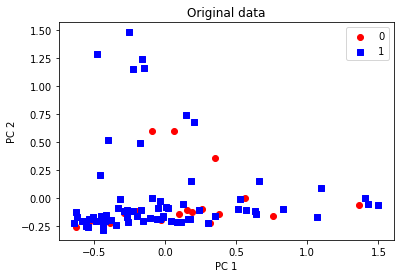

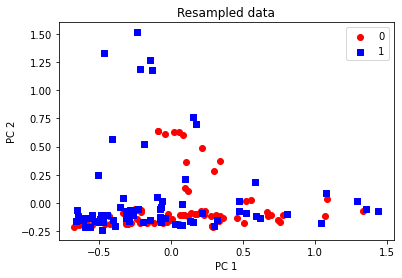

In [410]:
# spilt and resample mgx otu data
X_otu, y_otu, X_otu_test, y_otu_test = split_resample(mgx_otu_d_mean)

### Logistic regression

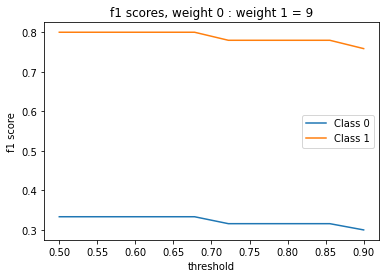

last F1 score for train, class 0: 1.0, class 1: 1.0


('_____PR AUC_____',
 {'Class 0': '0.77', 'Class 1': '0.78'},
 '_____F1 score_____',
           Hyperparameters   Class 0   Class 1
 0                  5, 0.5  0.235294  0.786885
 1   5, 0.5444444444444444  0.235294  0.786885
 2   5, 0.5888888888888889  0.235294  0.786885
 3   5, 0.6333333333333333  0.333333  0.800000
 4   5, 0.6777777777777778  0.333333  0.800000
 5   5, 0.7222222222222222  0.333333  0.800000
 6   5, 0.7666666666666666  0.333333  0.800000
 7   5, 0.8111111111111111  0.333333  0.800000
 8   5, 0.8555555555555556  0.333333  0.800000
 9                  5, 0.9  0.421053  0.813559
 10                 7, 0.5  0.222222  0.766667
 11  7, 0.5444444444444444  0.222222  0.766667
 12  7, 0.5888888888888889  0.222222  0.766667
 13  7, 0.6333333333333333  0.222222  0.766667
 14  7, 0.6777777777777778  0.222222  0.766667
 15  7, 0.7222222222222222  0.222222  0.766667
 16  7, 0.7666666666666666  0.222222  0.766667
 17  7, 0.8111111111111111  0.222222  0.766667
 18  7, 0.855555555555

In [436]:
# logistic regression on all features
logistic_regression(X_otu, X_otu_test, y_otu, y_otu_test, thres = np.linspace(0.5, 0.9, 10), k = None)

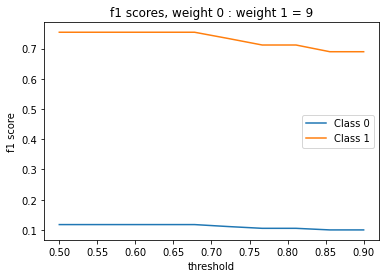

last F1 score for train, class 0: 1.0, class 1: 1.0


('_____PR AUC_____',
 {'Class 0': '0.85', 'Class 1': '0.76'},
 '_____F1 score_____',
           Hyperparameters   Class 0   Class 1
 0                  5, 0.5  0.222222  0.766667
 1   5, 0.5444444444444444  0.222222  0.766667
 2   5, 0.5888888888888889  0.222222  0.766667
 3   5, 0.6333333333333333  0.222222  0.766667
 4   5, 0.6777777777777778  0.222222  0.766667
 5   5, 0.7222222222222222  0.222222  0.766667
 6   5, 0.7666666666666666  0.222222  0.766667
 7   5, 0.8111111111111111  0.210526  0.745763
 8   5, 0.8555555555555556  0.210526  0.745763
 9                  5, 0.9  0.200000  0.724138
 10                 7, 0.5  0.222222  0.766667
 11  7, 0.5444444444444444  0.222222  0.766667
 12  7, 0.5888888888888889  0.222222  0.766667
 13  7, 0.6333333333333333  0.222222  0.766667
 14  7, 0.6777777777777778  0.222222  0.766667
 15  7, 0.7222222222222222  0.222222  0.766667
 16  7, 0.7666666666666666  0.222222  0.766667
 17  7, 0.8111111111111111  0.222222  0.766667
 18  7, 0.855555555555

In [435]:
# logistic regression with selected features
cols = selectkbest(X_otu, y_otu, None, 500)
logistic_regression(X_otu[cols], X_otu_test[cols], y_otu, y_otu_test, thres= np.linspace(0.5, 0.9, 10), k = None)

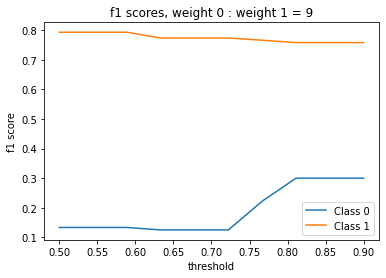

last F1 score for train, class 0: 1.0, class 1: 1.0


('_____PR AUC_____',
 {'Class 0': '0.78', 'Class 1': '0.76'},
 '_____F1 score_____',
           Hyperparameters   Class 0   Class 1
 0                  5, 0.5  0.142857  0.812500
 1   5, 0.5444444444444444  0.142857  0.812500
 2   5, 0.5888888888888889  0.142857  0.812500
 3   5, 0.6333333333333333  0.142857  0.812500
 4   5, 0.6777777777777778  0.142857  0.812500
 5   5, 0.7222222222222222  0.142857  0.812500
 6   5, 0.7666666666666666  0.133333  0.793651
 7   5, 0.8111111111111111  0.125000  0.774194
 8   5, 0.8555555555555556  0.111111  0.733333
 9                  5, 0.9  0.111111  0.733333
 10                 7, 0.5  0.142857  0.812500
 11  7, 0.5444444444444444  0.142857  0.812500
 12  7, 0.5888888888888889  0.142857  0.812500
 13  7, 0.6333333333333333  0.133333  0.793651
 14  7, 0.6777777777777778  0.133333  0.793651
 15  7, 0.7222222222222222  0.133333  0.793651
 16  7, 0.7666666666666666  0.133333  0.793651
 17  7, 0.8111111111111111  0.133333  0.793651
 18  7, 0.855555555555

In [441]:
# logistic regression with selected features
cols = shap_feat(X_otu, y_otu, RandomForestClassifier(), 500)
logistic_regression(X_otu[cols], X_otu_test[cols], y_otu, y_otu_test, thres = np.linspace(0.5, 0.9, 10), k = None)

### SGD

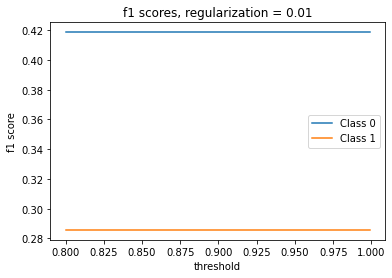

last F1 score for train, class 0: 0.7200000000000001, class 1: 0.8022598870056497


('_____PR AUC_____',
 {'Class 0': '0.85', 'Class 1': '0.85'},
 '_____F1 score_____',
              Hyperparameters   Class 0   Class 1
 0                  0.01, 0.8  0.418605  0.285714
 1   0.01, 0.8221111111111111  0.418605  0.285714
 2   0.01, 0.8442222222222222  0.418605  0.285714
 3   0.01, 0.8663333333333334  0.418605  0.285714
 4   0.01, 0.8884444444444445  0.418605  0.285714
 ..                       ...       ...       ...
 95   0.1, 0.9105555555555556  0.125000  0.774194
 96   0.1, 0.9326666666666666  0.125000  0.774194
 97   0.1, 0.9547777777777777  0.125000  0.774194
 98   0.1, 0.9768888888888889  0.125000  0.774194
 99                0.1, 0.999  0.125000  0.774194
 
 [100 rows x 3 columns],
 '_____Precision_____',
              Hyperparameters   Class 0  Class 1
 0                  0.01, 0.8  0.264706     1.00
 1   0.01, 0.8221111111111111  0.264706     1.00
 2   0.01, 0.8442222222222222  0.264706     1.00
 3   0.01, 0.8663333333333334  0.264706     1.00
 4   0.01, 0.888444

In [457]:
# sgd on all features
sgd(X_otu, X_otu_test, y_otu, y_otu_test, thres = np.linspace(0.8, 0.999, 10), k = None)

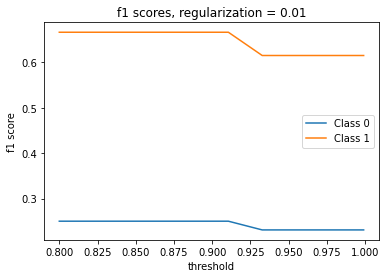

last F1 score for train, class 0: 0.8352941176470589, class 1: 0.7878787878787878


('_____PR AUC_____',
 {'Class 0': '0.86', 'Class 1': '0.78'},
 '_____F1 score_____',
              Hyperparameters  Class 0   Class 1
 0                  0.01, 0.8  0.25000  0.666667
 1   0.01, 0.8221111111111111  0.25000  0.666667
 2   0.01, 0.8442222222222222  0.25000  0.666667
 3   0.01, 0.8663333333333334  0.25000  0.666667
 4   0.01, 0.8884444444444445  0.25000  0.666667
 ..                       ...      ...       ...
 95   0.1, 0.9105555555555556  0.30303  0.488889
 96   0.1, 0.9326666666666666  0.30303  0.488889
 97   0.1, 0.9547777777777777  0.30303  0.488889
 98   0.1, 0.9768888888888889  0.30303  0.488889
 99                0.1, 0.999  0.30303  0.488889
 
 [100 rows x 3 columns],
 '_____Precision_____',
              Hyperparameters   Class 0   Class 1
 0                  0.01, 0.8  0.200000  0.750000
 1   0.01, 0.8221111111111111  0.200000  0.750000
 2   0.01, 0.8442222222222222  0.200000  0.750000
 3   0.01, 0.8663333333333334  0.200000  0.750000
 4   0.01, 0.8884444444444

In [458]:
# sgd with selected features
cols = selectkbest(X_otu, y_otu, None, 500)
sgd(X_otu[cols], X_otu_test[cols], y_otu, y_otu_test, thres= np.linspace(0.8, 0.999, 10), k = None)

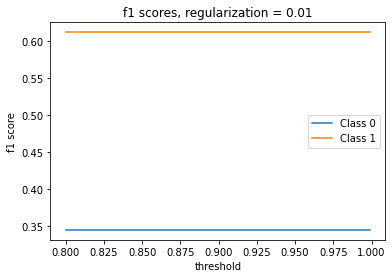

last F1 score for train, class 0: 0.802721088435374, class 1: 0.8129032258064516


('_____PR AUC_____',
 {'Class 0': '0.87', 'Class 1': '0.83'},
 '_____F1 score_____',
              Hyperparameters   Class 0   Class 1
 0                  0.01, 0.8  0.344828  0.612245
 1   0.01, 0.8221111111111111  0.344828  0.612245
 2   0.01, 0.8442222222222222  0.344828  0.612245
 3   0.01, 0.8663333333333334  0.344828  0.612245
 4   0.01, 0.8884444444444445  0.344828  0.612245
 ..                       ...       ...       ...
 95   0.1, 0.9105555555555556  0.105263  0.711864
 96   0.1, 0.9326666666666666  0.105263  0.711864
 97   0.1, 0.9547777777777777  0.105263  0.711864
 98   0.1, 0.9768888888888889  0.105263  0.711864
 99                0.1, 0.999  0.105263  0.711864
 
 [100 rows x 3 columns],
 '_____Precision_____',
              Hyperparameters  Class 0   Class 1
 0                  0.01, 0.8     0.25  0.789474
 1   0.01, 0.8221111111111111     0.25  0.789474
 2   0.01, 0.8442222222222222     0.25  0.789474
 3   0.01, 0.8663333333333334     0.25  0.789474
 4   0.01, 0.888444

In [459]:
# sgd with selected features
cols = shap_feat(X_otu, y_otu, RandomForestClassifier(), 500)
sgd(X_otu[cols], X_otu_test[cols], y_otu, y_otu_test, thres = np.linspace(0.8, 0.999, 10), k = None)

### Random forest

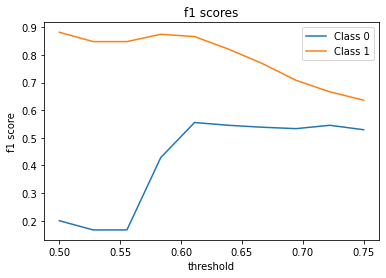

last F1 score for train, class 0: 1.0, class 1: 1.0
_____PR AUC_____
{'Class 0': '0.62', 'Class 1': '0.94'}
_____F1 score_____
  Threshold   Class 0   Class 1
0     0.500  0.200000  0.882353
1     0.528  0.166667  0.848485
2     0.556  0.166667  0.848485
3     0.583  0.428571  0.875000
4     0.611  0.555556  0.866667
5     0.639  0.545455  0.821429
6     0.667  0.538462  0.769231
7     0.694  0.533333  0.708333
8     0.722  0.545455  0.666667
9     0.750  0.529412  0.636364
_____Precision_____
  Threshold   Class 0   Class 1
0     0.500  1.000000  0.789474
1     0.528  0.333333  0.777778
2     0.556  0.333333  0.777778
3     0.583  0.600000  0.823529
4     0.611  0.555556  0.866667
5     0.639  0.461538  0.884615
6     0.667  0.411765  0.909091
7     0.694  0.380952  0.944444
8     0.722  0.375000  1.000000
9     0.750  0.360000  1.000000
_____Recall_____
  Threshold   Class 0   Class 1
0     0.500  0.111111  1.000000
1     0.528  0.111111  0.933333
2     0.556  0.111111  0.933333
3   

In [475]:
# random forests on all features
prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats = rfc(X_otu, X_otu_test, y_otu, y_otu_test, 200, np.linspace(0.5, 0.75, 10))
for each in ['_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat]:
    print(each)

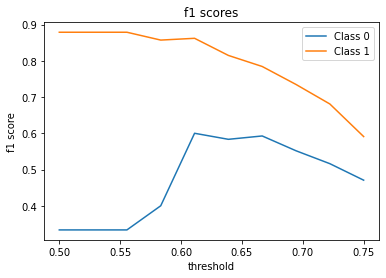

last F1 score for train, class 0: 1.0, class 1: 1.0
_____PR AUC_____
{'Class 0': '0.60', 'Class 1': '0.95'}
_____F1 score_____
  Threshold   Class 0   Class 1
0     0.500  0.333333  0.878788
1     0.528  0.333333  0.878788
2     0.556  0.333333  0.878788
3     0.583  0.400000  0.857143
4     0.611  0.600000  0.862069
5     0.639  0.583333  0.814815
6     0.667  0.592593  0.784314
7     0.694  0.551724  0.734694
8     0.722  0.516129  0.680851
9     0.750  0.470588  0.590909
_____Precision_____
  Threshold   Class 0   Class 1
0     0.500  0.666667  0.805556
1     0.528  0.666667  0.805556
2     0.556  0.666667  0.805556
3     0.583  0.500000  0.818182
4     0.611  0.545455  0.892857
5     0.639  0.466667  0.916667
6     0.667  0.444444  0.952381
7     0.694  0.400000  0.947368
8     0.722  0.363636  0.941176
9     0.750  0.320000  0.928571
_____Recall_____
  Threshold   Class 0   Class 1
0     0.500  0.222222  0.966667
1     0.528  0.222222  0.966667
2     0.556  0.222222  0.966667
3   

In [476]:
# random forest on selected features
prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats = rfc(X_otu[feats], X_otu_test[feats], y_otu, y_otu_test, 50, np.linspace(0.5, 0.75, 10))
for each in ['_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat]:
    print(each)

In [477]:
# 50 most important features according to random forest
for each in mgx_otu_names[feats]:
    print(each)

k__Archaea|p__Euryarchaeota
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified
k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales
k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum|s__Actinobaculum_unclassified
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii|t__Actinomyces_graevenitzii_unclassified
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__

### Gradient Boosting

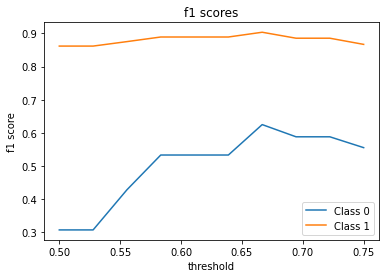

last F1 score for train, class 0: 1.0, class 1: 1.0
_____PR AUC_____
{'Class 0': '0.64', 'Class 1': '0.94'}
_____F1 score_____
  Threshold   Class 0   Class 1
0     0.500  0.307692  0.861538
1     0.528  0.307692  0.861538
2     0.556  0.428571  0.875000
3     0.583  0.533333  0.888889
4     0.611  0.533333  0.888889
5     0.639  0.533333  0.888889
6     0.667  0.625000  0.903226
7     0.694  0.588235  0.885246
8     0.722  0.588235  0.885246
9     0.750  0.555556  0.866667
_____Precision_____
  Threshold   Class 0   Class 1
0     0.500  0.500000  0.800000
1     0.528  0.500000  0.800000
2     0.556  0.600000  0.823529
3     0.583  0.666667  0.848485
4     0.611  0.666667  0.848485
5     0.639  0.666667  0.848485
6     0.667  0.714286  0.875000
7     0.694  0.625000  0.870968
8     0.722  0.625000  0.870968
9     0.750  0.555556  0.866667
_____Recall_____
  Threshold   Class 0   Class 1
0     0.500  0.222222  0.933333
1     0.528  0.222222  0.933333
2     0.556  0.333333  0.933333
3   

In [471]:
# gradient boosting on all features
prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats = xgboost(X_otu, X_otu_test, y_otu, y_otu_test, 200, np.linspace(0.5, 0.75, 10))
for each in ['_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat]:
    print(each)

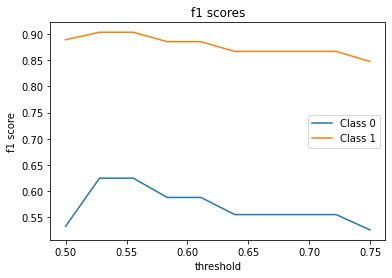

last F1 score for train, class 0: 1.0, class 1: 1.0
_____PR AUC_____
{'Class 0': '0.65', 'Class 1': '0.93'}
_____F1 score_____
  Threshold   Class 0   Class 1
0     0.500  0.533333  0.888889
1     0.528  0.625000  0.903226
2     0.556  0.625000  0.903226
3     0.583  0.588235  0.885246
4     0.611  0.588235  0.885246
5     0.639  0.555556  0.866667
6     0.667  0.555556  0.866667
7     0.694  0.555556  0.866667
8     0.722  0.555556  0.866667
9     0.750  0.526316  0.847458
_____Precision_____
  Threshold   Class 0   Class 1
0     0.500  0.666667  0.848485
1     0.528  0.714286  0.875000
2     0.556  0.714286  0.875000
3     0.583  0.625000  0.870968
4     0.611  0.625000  0.870968
5     0.639  0.555556  0.866667
6     0.667  0.555556  0.866667
7     0.694  0.555556  0.866667
8     0.722  0.555556  0.866667
9     0.750  0.500000  0.862069
_____Recall_____
  Threshold   Class 0   Class 1
0     0.500  0.444444  0.933333
1     0.528  0.555556  0.933333
2     0.556  0.555556  0.933333
3   

In [472]:
# gradient boosting on selected features
prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats = xgboost(X_otu[feats], X_otu_test[feats], y_otu, y_otu_test, 50, np.linspace(0.5, 0.75, 10))
for each in ['_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat]:
    print(each)

In [474]:
# 50 most important features according to gradient boosting
for each in mgx_otu_names[feats]:
    print(each)

k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae
k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum|s__Actinobaculum_schaalii
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_europaeus
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii|t__Actinomyces_graevenitzii_unclassified
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_mcbrellneri
k__Bacteria|p__Actinobacteria|c__Actinobacter

### Neural networks

In [479]:
# neural networks on all features
neural_networks(X_otu, X_otu_test, y_otu, y_otu_test, thres = np.linspace(0.5, 0.9, 10), k=None)

Epoch 1/10
4/4 [==============================] - 0s 38ms/step - loss: 0.6670 - accuracy: 0.0000e+00 - val_loss: 0.8777 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6269 - accuracy: 0.0000e+00 - val_loss: 1.0261 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6017 - accuracy: 0.0000e+00 - val_loss: 1.1420 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 0.5858 - accuracy: 0.0000e+00 - val_loss: 1.2007 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.5733 - accuracy: 0.0000e+00 - val_loss: 1.2251 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.5623 - accuracy: 0.0000e+00 - val_loss: 1.2729 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.5503 - accuracy: 0.0000e+00 - val_loss: 1.2612 - va

,Threshold,Confusion matrix
0,0.500,"[[0, 9], [1, 29]]"
1,0.544,"[[0, 9], [2, 28]]"
2,0.589,"[[0, 9], [3, 27]]"
3,0.633,"[[2, 7], [7, 23]]"
4,0.678,"[[5, 4], [12, 18]]"
5,0.722,"[[7, 2], [19, 11]]"
6,0.767,"[[7, 2], [21, 9]]"
7,0.811,"[[9, 0], [26, 4]]"
8,0.856,"[[9, 0], [28, 2]]"
9,0.900,"[[9, 0], [29, 1]]"


## MTX Pathways

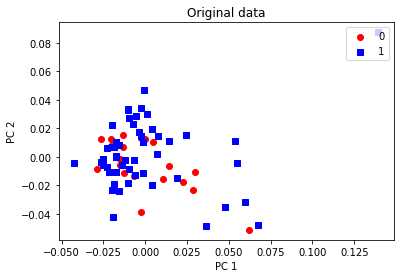

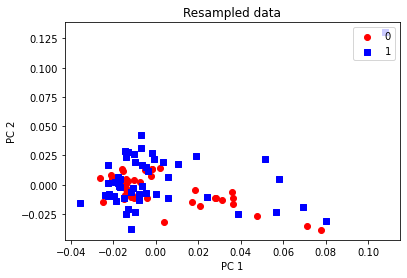

In [480]:
# split and resample mtx pathways data
X_path, y_path, X_path_test, y_path_test = split_resample(mtx_path_d_mean)

### Logistic regression

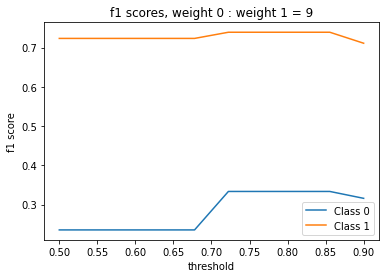

last F1 score for train, class 0: 1.0, class 1: 1.0


('_____PR AUC_____',
 {'Class 0': '0.75', 'Class 1': '0.87'},
 '_____F1 score_____',
           Hyperparameters   Class 0   Class 1
 0                  5, 0.5  0.235294  0.723404
 1   5, 0.5444444444444444  0.235294  0.723404
 2   5, 0.5888888888888889  0.235294  0.723404
 3   5, 0.6333333333333333  0.235294  0.723404
 4   5, 0.6777777777777778  0.235294  0.723404
 5   5, 0.7222222222222222  0.235294  0.723404
 6   5, 0.7666666666666666  0.235294  0.723404
 7   5, 0.8111111111111111  0.333333  0.739130
 8   5, 0.8555555555555556  0.333333  0.739130
 9                  5, 0.9  0.315789  0.711111
 10                 7, 0.5  0.235294  0.723404
 11  7, 0.5444444444444444  0.235294  0.723404
 12  7, 0.5888888888888889  0.235294  0.723404
 13  7, 0.6333333333333333  0.235294  0.723404
 14  7, 0.6777777777777778  0.235294  0.723404
 15  7, 0.7222222222222222  0.235294  0.723404
 16  7, 0.7666666666666666  0.235294  0.723404
 17  7, 0.8111111111111111  0.235294  0.723404
 18  7, 0.855555555555

In [481]:
# logistic regression on all features
logistic_regression(X_path, X_path_test, y_path, y_path_test, thres = np.linspace(0.5, 0.9, 10), k = None)

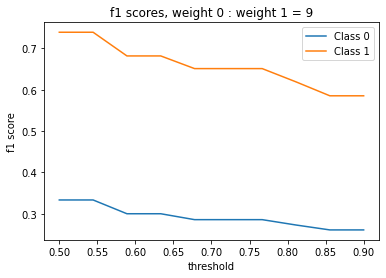

last F1 score for train, class 0: 1.0, class 1: 1.0


('_____PR AUC_____',
 {'Class 0': '0.78', 'Class 1': '0.86'},
 '_____F1 score_____',
           Hyperparameters   Class 0   Class 1
 0                  5, 0.5  0.222222  0.695652
 1   5, 0.5444444444444444  0.210526  0.666667
 2   5, 0.5888888888888889  0.210526  0.666667
 3   5, 0.6333333333333333  0.210526  0.666667
 4   5, 0.6777777777777778  0.210526  0.666667
 5   5, 0.7222222222222222  0.210526  0.666667
 6   5, 0.7666666666666666  0.200000  0.636364
 7   5, 0.8111111111111111  0.190476  0.604651
 8   5, 0.8555555555555556  0.190476  0.604651
 9                  5, 0.9  0.181818  0.571429
 10                 7, 0.5  0.300000  0.681818
 11  7, 0.5444444444444444  0.300000  0.681818
 12  7, 0.5888888888888889  0.300000  0.681818
 13  7, 0.6333333333333333  0.300000  0.681818
 14  7, 0.6777777777777778  0.300000  0.681818
 15  7, 0.7222222222222222  0.300000  0.681818
 16  7, 0.7666666666666666  0.285714  0.651163
 17  7, 0.8111111111111111  0.285714  0.651163
 18  7, 0.855555555555

In [482]:
# logistic regression on selected features
cols = selectkbest(X_path, y_path, None, 500)
logistic_regression(X_path[cols], X_path_test[cols], y_path, y_path_test, thres= np.linspace(0.5, 0.9, 10), k = None)

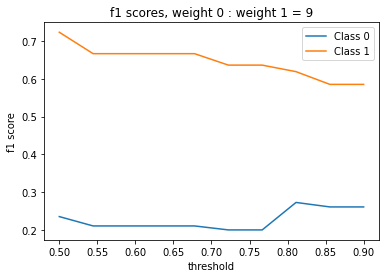

last F1 score for train, class 0: 1.0, class 1: 1.0


('_____PR AUC_____',
 {'Class 0': '0.82', 'Class 1': '0.84'},
 '_____F1 score_____',
           Hyperparameters   Class 0   Class 1
 0                  5, 0.5  0.235294  0.723404
 1   5, 0.5444444444444444  0.235294  0.723404
 2   5, 0.5888888888888889  0.222222  0.695652
 3   5, 0.6333333333333333  0.210526  0.666667
 4   5, 0.6777777777777778  0.210526  0.666667
 5   5, 0.7222222222222222  0.210526  0.666667
 6   5, 0.7666666666666666  0.200000  0.636364
 7   5, 0.8111111111111111  0.200000  0.636364
 8   5, 0.8555555555555556  0.200000  0.636364
 9                  5, 0.9  0.190476  0.604651
 10                 7, 0.5  0.235294  0.723404
 11  7, 0.5444444444444444  0.235294  0.723404
 12  7, 0.5888888888888889  0.222222  0.695652
 13  7, 0.6333333333333333  0.222222  0.695652
 14  7, 0.6777777777777778  0.210526  0.666667
 15  7, 0.7222222222222222  0.200000  0.636364
 16  7, 0.7666666666666666  0.200000  0.636364
 17  7, 0.8111111111111111  0.200000  0.636364
 18  7, 0.855555555555

In [483]:
# logistic regression on selected features
cols = shap_feat(X_path, y_path, RandomForestClassifier(), 500)
logistic_regression(X_path[cols], X_path_test[cols], y_path, y_path_test, thres = np.linspace(0.5, 0.9, 10), k = None)

### SGD

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an

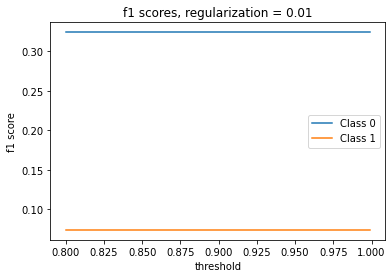

last F1 score for train, class 0: 0.0, class 1: 0.6842105263157895


('_____PR AUC_____',
 {'Class 0': '0.91', 'Class 1': '0.91'},
 '_____F1 score_____',
              Hyperparameters   Class 0   Class 1
 0                  0.01, 0.8  0.324324  0.074074
 1   0.01, 0.8221111111111111  0.324324  0.074074
 2   0.01, 0.8442222222222222  0.324324  0.074074
 3   0.01, 0.8663333333333334  0.324324  0.074074
 4   0.01, 0.8884444444444445  0.324324  0.074074
 ..                       ...       ...       ...
 95   0.1, 0.9105555555555556  0.000000  0.896552
 96   0.1, 0.9326666666666666  0.000000  0.896552
 97   0.1, 0.9547777777777777  0.000000  0.896552
 98   0.1, 0.9768888888888889  0.000000  0.896552
 99                0.1, 0.999  0.000000  0.896552
 
 [100 rows x 3 columns],
 '_____Precision_____',
              Hyperparameters   Class 0  Class 1
 0                  0.01, 0.8  0.193548   1.0000
 1   0.01, 0.8221111111111111  0.193548   1.0000
 2   0.01, 0.8442222222222222  0.193548   1.0000
 3   0.01, 0.8663333333333334  0.193548   1.0000
 4   0.01, 0.888444

In [485]:
# sgd on all features
sgd(X_path, X_path_test, y_path, y_path_test, thres = np.linspace(0.8, 0.999, 10), k = None)

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an

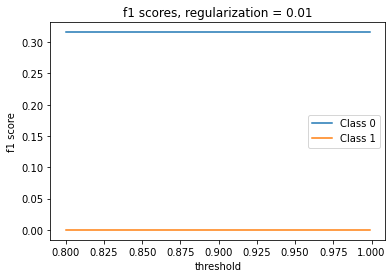

last F1 score for train, class 0: 0.0, class 1: 0.6842105263157895


('_____PR AUC_____',
 {'Class 0': '0.91', 'Class 1': '0.91'},
 '_____F1 score_____',
              Hyperparameters   Class 0   Class 1
 0                  0.01, 0.8  0.315789  0.000000
 1   0.01, 0.8221111111111111  0.315789  0.000000
 2   0.01, 0.8442222222222222  0.315789  0.000000
 3   0.01, 0.8663333333333334  0.315789  0.000000
 4   0.01, 0.8884444444444445  0.315789  0.000000
 ..                       ...       ...       ...
 95   0.1, 0.9105555555555556  0.000000  0.896552
 96   0.1, 0.9326666666666666  0.000000  0.896552
 97   0.1, 0.9547777777777777  0.000000  0.896552
 98   0.1, 0.9768888888888889  0.000000  0.896552
 99                0.1, 0.999  0.000000  0.896552
 
 [100 rows x 3 columns],
 '_____Precision_____',
              Hyperparameters  Class 0  Class 1
 0                  0.01, 0.8   0.1875   0.0000
 1   0.01, 0.8221111111111111   0.1875   0.0000
 2   0.01, 0.8442222222222222   0.1875   0.0000
 3   0.01, 0.8663333333333334   0.1875   0.0000
 4   0.01, 0.88844444444

In [484]:
# sgd on selected features
cols = selectkbest(X_path, y_path, None, 500)
sgd(X_path[cols], X_path_test[cols], y_path, y_path_test, thres= np.linspace(0.8, 0.999, 10), k = None)

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an

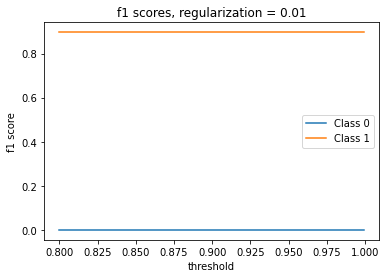

last F1 score for train, class 0: 0.653061224489796, class 1: 0.03773584905660378


('_____PR AUC_____',
 {'Class 0': '0.91', 'Class 1': '0.91'},
 '_____F1 score_____',
              Hyperparameters   Class 0   Class 1
 0                  0.01, 0.8  0.000000  0.896552
 1   0.01, 0.8221111111111111  0.000000  0.896552
 2   0.01, 0.8442222222222222  0.000000  0.896552
 3   0.01, 0.8663333333333334  0.000000  0.896552
 4   0.01, 0.8884444444444445  0.000000  0.896552
 ..                       ...       ...       ...
 95   0.1, 0.9105555555555556  0.315789  0.000000
 96   0.1, 0.9326666666666666  0.315789  0.000000
 97   0.1, 0.9547777777777777  0.315789  0.000000
 98   0.1, 0.9768888888888889  0.315789  0.000000
 99                0.1, 0.999  0.315789  0.000000
 
 [100 rows x 3 columns],
 '_____Precision_____',
              Hyperparameters  Class 0  Class 1
 0                  0.01, 0.8   0.0000   0.8125
 1   0.01, 0.8221111111111111   0.0000   0.8125
 2   0.01, 0.8442222222222222   0.0000   0.8125
 3   0.01, 0.8663333333333334   0.0000   0.8125
 4   0.01, 0.88844444444

In [486]:
# sgd on selected features
cols = shap_feat(X_path, y_path, RandomForestClassifier(), 500)
sgd(X_path[cols], X_path_test[cols], y_path, y_path_test, thres = np.linspace(0.8, 0.999, 10), k = None)

### Random forest

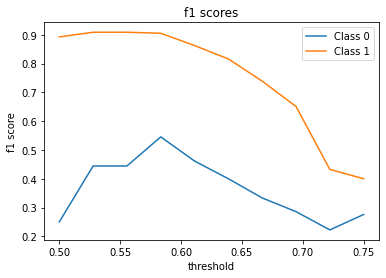

last F1 score for train, class 0: 1.0, class 1: 1.0
_____PR AUC_____
{'Class 0': '0.73', 'Class 1': '0.80'}
_____F1 score_____
  Threshold   Class 0   Class 1
0     0.500  0.250000  0.892857
1     0.528  0.444444  0.909091
2     0.556  0.444444  0.909091
3     0.583  0.545455  0.905660
4     0.611  0.461538  0.862745
5     0.639  0.400000  0.816327
6     0.667  0.333333  0.739130
7     0.694  0.285714  0.651163
8     0.722  0.222222  0.432432
9     0.750  0.275862  0.400000
_____Precision_____
  Threshold   Class 0   Class 1
0     0.500  0.500000  0.833333
1     0.528  0.666667  0.862069
2     0.556  0.666667  0.862069
3     0.583  0.600000  0.888889
4     0.611  0.428571  0.880000
5     0.639  0.333333  0.869565
6     0.667  0.250000  0.850000
7     0.694  0.200000  0.823529
8     0.722  0.142857  0.727273
9     0.750  0.173913  0.777778
_____Recall_____
  Threshold   Class 0   Class 1
0     0.500  0.166667  0.961538
1     0.528  0.333333  0.961538
2     0.556  0.333333  0.961538
3   

In [487]:
# random forest on all features
prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats = rfc(X_path, X_path_test, y_path, y_path_test, 200, np.linspace(0.5, 0.75, 10))
for each in ['_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat]:
    print(each)

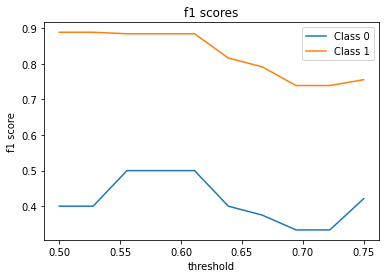

last F1 score for train, class 0: 1.0, class 1: 1.0
_____PR AUC_____
{'Class 0': '0.74', 'Class 1': '0.82'}
_____F1 score_____
  Threshold   Class 0   Class 1
0     0.500  0.400000  0.888889
1     0.528  0.400000  0.888889
2     0.556  0.500000  0.884615
3     0.583  0.500000  0.884615
4     0.611  0.500000  0.884615
5     0.639  0.400000  0.816327
6     0.667  0.375000  0.791667
7     0.694  0.333333  0.739130
8     0.722  0.333333  0.739130
9     0.750  0.421053  0.755556
_____Precision_____
  Threshold   Class 0   Class 1
0     0.500  0.500000  0.857143
1     0.528  0.500000  0.857143
2     0.556  0.500000  0.884615
3     0.583  0.500000  0.884615
4     0.611  0.500000  0.884615
5     0.639  0.333333  0.869565
6     0.667  0.300000  0.863636
7     0.694  0.250000  0.850000
8     0.722  0.250000  0.850000
9     0.750  0.307692  0.894737
_____Recall_____
  Threshold   Class 0   Class 1
0     0.500  0.333333  0.923077
1     0.528  0.333333  0.923077
2     0.556  0.500000  0.884615
3   

In [488]:
# random forest on selected features
prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats = rfc(X_path[feats], X_path_test[feats], y_path, y_path_test, 50, np.linspace(0.5, 0.75, 10))
for each in ['_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat]:
    print(each)

In [489]:
# 50 most important features according to random forest
for each in mtx_path_names[feats]:
    print(each)

1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Akkermansia.s__Akkermansia_muciniphila
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_caccae
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_faecis
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_sp_1_1_6
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_xylanisolvens
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Parabacteroides.s__Parabacteroides_distasonis
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Parabacteroides.s__Parabacteroides_johnsonii
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Parabacteroides.s__Parabacteroides_sp_D13
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY: 4-hydroxyphenylacetate degradation|g__Escherichia.s__Escherichia_coli
7ALPHADEHYDROX-PWY: cholate degradation (bacteria, anaerobic)
AEROBACTINSYN-PWY: aerobactin biosynthesis
AEROBACTINSYN-PWY: a

### Gradient boosting

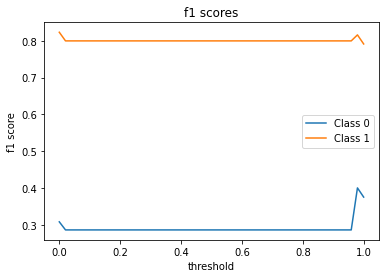

last F1 score for train, class 0: 1.0, class 1: 1.0
_____PR AUC_____
{'Class 0': '0.80', 'Class 1': '0.87'}
_____F1 score_____
   Threshold   Class 0   Class 1
0      0.001  0.307692  0.823529
1      0.021  0.285714  0.800000
2      0.042  0.285714  0.800000
3      0.062  0.285714  0.800000
4      0.082  0.285714  0.800000
5      0.103  0.285714  0.800000
6      0.123  0.285714  0.800000
7      0.144  0.285714  0.800000
8      0.164  0.285714  0.800000
9      0.184  0.285714  0.800000
10     0.205  0.285714  0.800000
11     0.225  0.285714  0.800000
12     0.245  0.285714  0.800000
13     0.266  0.285714  0.800000
14     0.286  0.285714  0.800000
15     0.307  0.285714  0.800000
16     0.327  0.285714  0.800000
17     0.347  0.285714  0.800000
18     0.368  0.285714  0.800000
19     0.388  0.285714  0.800000
20     0.408  0.285714  0.800000
21     0.429  0.285714  0.800000
22     0.449  0.285714  0.800000
23     0.469  0.285714  0.800000
24     0.490  0.285714  0.800000
25     0.510  0

In [496]:
# gradient boosting on all features
prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats = xgboost(X_path, X_path_test, y_path, y_path_test, 200, np.linspace(0.001, 0.999, 50))
for each in ['_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat]:
    print(each)

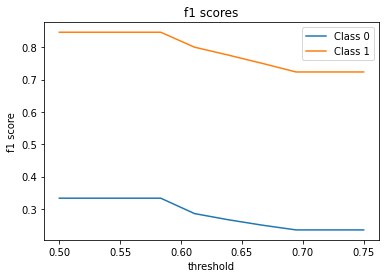

last F1 score for train, class 0: 1.0, class 1: 1.0
_____PR AUC_____
{'Class 0': '0.77', 'Class 1': '0.77'}
_____F1 score_____
  Threshold   Class 0   Class 1
0     0.500  0.333333  0.846154
1     0.528  0.333333  0.846154
2     0.556  0.333333  0.846154
3     0.583  0.333333  0.846154
4     0.611  0.285714  0.800000
5     0.639  0.266667  0.775510
6     0.667  0.250000  0.750000
7     0.694  0.235294  0.723404
8     0.722  0.235294  0.723404
9     0.750  0.235294  0.723404
_____Precision_____
  Threshold   Class 0   Class 1
0     0.500  0.333333  0.846154
1     0.528  0.333333  0.846154
2     0.556  0.333333  0.846154
3     0.583  0.333333  0.846154
4     0.611  0.250000  0.833333
5     0.639  0.222222  0.826087
6     0.667  0.200000  0.818182
7     0.694  0.181818  0.809524
8     0.722  0.181818  0.809524
9     0.750  0.181818  0.809524
_____Recall_____
  Threshold   Class 0   Class 1
0     0.500  0.333333  0.846154
1     0.528  0.333333  0.846154
2     0.556  0.333333  0.846154
3   

In [492]:
# gradient boosting on selected features
prauc_mat, f1_mat, precision_mat, recall_mat, cm_mat, feats = xgboost(X_path[feats], X_path_test[feats], y_path, y_path_test, 50, np.linspace(0.5, 0.75, 10))
for each in ['_____PR AUC_____', prauc_mat, '_____F1 score_____', f1_mat, \
    '_____Precision_____', precision_mat, '_____Recall_____', recall_mat, '_____Confusion maxtrix_____', cm_mat]:
    print(each)

In [493]:
# 50 most important features according to gradient boosting
for each in mtx_path_names[feats]:
    print(each)

1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Akkermansia.s__Akkermansia_muciniphila
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_barnesiae
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_caccae
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_cellulosilyticus
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_clarus
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_coprocola
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_faecis
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_finegoldii
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_fluxus
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Bacteroides.s__Bacteroides_fragilis
1CMET2-PWY: N10-form

### Neural networks

In [494]:
# neural networks on all features
neural_networks(X_path, X_path_test, y_path, y_path_test, thres = np.linspace(0.5, 0.9, 10), k=None)

Epoch 1/10
3/3 [==============================] - 0s 46ms/step - loss: 0.6900 - accuracy: 0.0000e+00 - val_loss: 0.7200 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6770 - accuracy: 0.0000e+00 - val_loss: 0.7467 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6664 - accuracy: 0.0000e+00 - val_loss: 0.7782 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6536 - accuracy: 0.0000e+00 - val_loss: 0.8134 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6413 - accuracy: 0.0000e+00 - val_loss: 0.8530 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6297 - accuracy: 0.0000e+00 - val_loss: 0.8984 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6200 - accuracy: 0.0000e+00 - val_loss: 0.9497 - v

,Threshold,Confusion matrix
0,0.500,"[[0, 6], [0, 26]]"
1,0.544,"[[0, 6], [0, 26]]"
2,0.589,"[[0, 6], [0, 26]]"
3,0.633,"[[0, 6], [0, 26]]"
4,0.678,"[[0, 6], [2, 24]]"
5,0.722,"[[6, 0], [26, 0]]"
6,0.767,"[[6, 0], [26, 0]]"
7,0.811,"[[6, 0], [26, 0]]"
8,0.856,"[[6, 0], [26, 0]]"
9,0.900,"[[6, 0], [26, 0]]"
